In [ ]:

link_artificial1d = r'https://raw.githubusercontent.com/Danieloliver1/UFC_mestrado/main/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_01_ama/artificial1d.csv?token=GHSAT0AAAAAACPK6ODCASMCAGSNVYGIQDF6ZPMUW4Q'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(link_artificial1d, header = None)

In [ ]:
df.columns = ['x','y']

In [ ]:
df

In [ ]:

# Ajuste o modelo de regressão linear
model = LinearRegression()
model.fit(df[['x']], df['y'])

# Obtenha os coeficientes da regressão
coeficientes = model.coef_[0]  # Coeficiente angular
intercepto = model.intercept_  # Intercepto

# Calcule os valores previstos
y_pred = model.predict(df[['x']])

# Calcule os erros
erros = y_pred - df['y']

# Calcule o erro quadrático médio
MSE = mean_squared_error(df['y'], y_pred)

# Exiba os resultados
print("Coeficiente angular:", coeficientes)
print("Intercepto:", intercepto)
print("Erro quadrático médio:", MSE)

# Visualize os primeiros valores do DataFrame com os resultados
resultados = pd.DataFrame({'x': df['x'], 'y': df['y'], 'y_pred': y_pred, 'erro': erros})
print(resultados.head())


Coeficiente angular: 1.5748651690368305
Intercepto: 0.06761792463834032
Erro quadrático médio: 0.21340090132936987
          x         y    y_pred      erro
0 -1.000000 -2.082017 -1.507247  0.574770
1 -0.931034 -1.326980 -1.398636 -0.071656
2 -0.862069 -1.105598 -1.290024 -0.184427
3 -0.793103 -0.873946 -1.181413 -0.307467
4 -0.724138 -0.285027 -1.072802 -0.787775


In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter = 500, eta0 = 0.01,tol = 0.0001,verbose=1, random_state=53)

In [ ]:
X = df['x'].values.reshape(-1, 1)
y = df['y'].values

In [ ]:
sgd.fit(X,y)

In [ ]:
# Acessar os coeficientes do modelo
coeficientes = sgd.coef_
intercepto = sgd.intercept_

print('Coeficientes:', coeficientes)
print('Intercepto:', intercepto)


Coeficientes: [1.44060995]
Intercepto: [0.06748966]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Fazer previsões
y_pred = sgd.predict(X)

# Calcular R² e RMSE
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print('R²:', r2)
print('RMSE:', rmse)


R²: 0.7996414881870095
RMSE: 0.4688533119641735


In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# # Gerando dados de exemplo
# X, y = make_regression(n_samples=500, n_features=1, noise=0.1, random_state=42)

# Inicializando o SGDRegressor
# sgd = SGDRegressor(loss='squared_loss', random_state=42)

# Listas para armazenar iteração e erro
iteracoes = []
erros = []

# Treinando o modelo e registrando o erro de cada iteração
for i in range(500):  # Número de iterações desejado
    sgd.partial_fit(X, y)
    y_pred = sgd.predict(X)
    erro_iteracao = mean_squared_error(y, y_pred)
    iteracoes.append(i)
    erros.append(erro_iteracao)

# # Exibindo as iterações e os erros
# for it, err in zip(iteracoes, erros):
#     print(f"Iteração {it+1}: Erro = {err}")


# Plotar a curva de aprendizado
plt.plot(iteracoes, erros, label='Curva de Aprendizagem')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro MSE')
plt.title('Curva de Aprendizagem do SGDRegressor')
plt.legend()
plt.show()

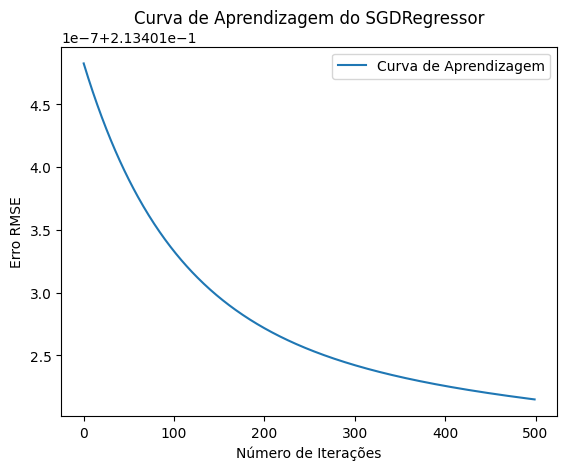

In [ ]:
plt.plot(range(len(erros)), erros, label='Curva de Aprendizagem')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro RMSE')
plt.title('Curva de Aprendizagem do SGDRegressor')
plt.legend()
plt.show()

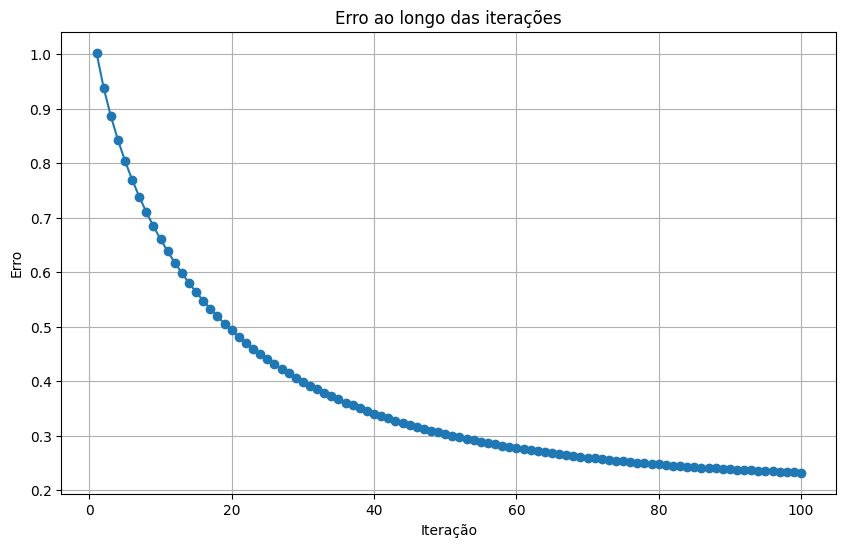

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dados fornecidos
x = np.array([-1.000000, -0.931034, -0.862069, -0.793103, -0.724138, -0.655172, -0.586207, -0.517241, -0.448276,
              -0.379310, -0.310345, -0.241379, -0.172414, -0.103448, -0.034483, 0.034483, 0.103448, 0.172414,
              0.241379, 0.310345, 0.379310, 0.448276, 0.517241, 0.586207, 0.655172, 0.724138, 0.793103, 0.862069,
              0.931034, 1.000000]).reshape(-1, 1)

y = np.array([-2.082017, -1.326980, -1.105598, -0.873946, -0.285027, -0.431153, -0.794754, -0.886068, -0.899900,
              -0.861844, -0.888052, -1.235951, -0.719568, -0.452023, 0.098900, 0.348970, 0.097478, 0.700198,
              1.310512, 1.001776, 1.003182, 1.149101, 1.592206, 0.609090, 0.594416, 0.703007, 0.823322, 1.106464,
              1.422957, 2.309838])

# Definindo o modelo de regressão linear usando SGD
model = SGDRegressor(max_iter=500, tol=1e-3)

# Listas para armazenar os erros em cada iteração
erros_iteracao = []
mse_iteracao = []

# Treinamento do modelo e cálculo dos erros
for epoch in range(100):  # Número de épocas
    model.partial_fit(x, y)  # Treina o modelo com uma época de dados
    predicoes = model.predict(x)  # Faz predições com o modelo treinado
    erro = mean_squared_error(y, predicoes)  # Calcula o MSE
    erros_iteracao.append(erro)
    mse_iteracao.append(np.mean(erros_iteracao))

# Criando e exibindo o gráfico de erro
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(erros_iteracao) + 1), erros_iteracao, marker='o')
plt.xlabel('Iteração')
plt.ylabel('Erro')
plt.title('Erro ao longo das iterações')
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor

# Dados fornecidos
x = np.array([-1.000000, -0.931034, -0.862069, -0.793103, -0.724138, -0.655172, -0.586207, -0.517241, -0.448276,
              -0.379310, -0.310345, -0.241379, -0.172414, -0.103448, -0.034483, 0.034483, 0.103448, 0.172414,
              0.241379, 0.310345, 0.379310, 0.448276, 0.517241, 0.586207, 0.655172, 0.724138, 0.793103, 0.862069,
              0.931034, 1.000000]).reshape(-1, 1)

y = np.array([-2.082017, -1.326980, -1.105598, -0.873946, -0.285027, -0.431153, -0.794754, -0.886068, -0.899900,
              -0.861844, -0.888052, -1.235951, -0.719568, -0.452023, 0.098900, 0.348970, 0.097478, 0.700198,
              1.310512, 1.001776, 1.003182, 1.149101, 1.592206, 0.609090, 0.594416, 0.703007, 0.823322, 1.106464,
              1.422957, 2.309838])

# Definindo o modelo de regressão linear usando SGD
model = SGDRegressor(max_iter=500, tol=1e-3)

# Treinando o modelo com os dados
model.fit(x, y)

# Obtendo os coeficientes do modelo treinado
coeficiente_angular = model.coef_[0]
intercepto = model.intercept_

print(f"Coeficiente Angular: {coeficiente_angular}")
print(f"Intercepto: {intercepto}")



Coeficiente Angular: 1.1966951020385015
Intercepto: [0.06662734]


In [ ]:
#!pip install LinearAlgebra
!pip install scratch


  Preparing metadata (setup.py) ... done
  Created wheel for scratch: filename=scratch-1.0.0-py2.py3-none-any.whl size=4889 sha256=c5c9dc28befc69963f0e5a494e898abca02e3fdaf2b0f67a0bfda6bbec5422a9
  Stored in directory: /root/.cache/pip/wheels/3d/bf/6e/e1ae84c0715e36d2c2c808a0ef17c289866ca1e79c32ad378c
Successfully built scratch


In [ ]:
class Vector:
    def __init__(self, *components):
        self.components = components

    def __len__(self):
        return len(self.components)

    def __getitem__(self, i):
        return self.components[i]

def dot(v1, v2):
    if len(v1) != len(v2):
        raise ValueError("Vectors must have the same length")
    return sum(v1[i] * v2[i] for i in range(len(v1)))

# Exemplo de uso:
v1 = Vector(1, 2, 3)
v2 = Vector(4, 5, 6)
resultado = dot(v1, v2)
print(resultado)


32


In [ ]:
# from scratch.linear_algebra import Vector, dot



# def sum_of_squares(v):
#     """computes the sum of squared elements in v"""
#     valor = 0
#     for v_i in v:
#       valor += v_i ** 2

#     #return sum(v_i ** 2 for v_i in v)
#     return valor


def sum_of_squares(v:Vector) ->float:
    """computes the sum of squared elements in v"""

    return dot(v,v)

sum_of_squares(df.x)

10.68965517241379

In [ ]:
# elevando x ao quadrado e somando total
val = sum(df.x **2)
val

10.68965517241379

O gradiente descendente é um algoritmo de otimização usado para encontrar o mínimo de uma função. Ele funciona atualizando iterativamente os parâmetros na direção oposta do gradiente da função objetivo. Aqui está uma implementação básica passo a passo:

1-Inicialização dos parâmetros: Começamos definindo os parâmetros iniciais, como a inclinação e o intercepto para uma linha reta.

2-Definição da função de custo: Devemos definir uma função de custo que mede o quão bem nosso modelo se ajusta aos dados. Neste caso, usaremos o erro quadrático médio (MSE - Mean Squared Error).

3-Atualização dos parâmetros: Calculamos o gradiente da função de custo em relação aos parâmetros e, em seguida, atualizamos os parâmetros na direção oposta do gradiente.

4-Repetição do processo: Repetimos o processo de atualização dos parâmetros até que a função de custo convirja para um valor mínimo ou até que um número máximo de iterações seja atingido.

Parâmetro m: 1.5307876720584572
Parâmetro b: 0.06761515068160434
Erro quadrático médio (MSE): 0.21409317257771113


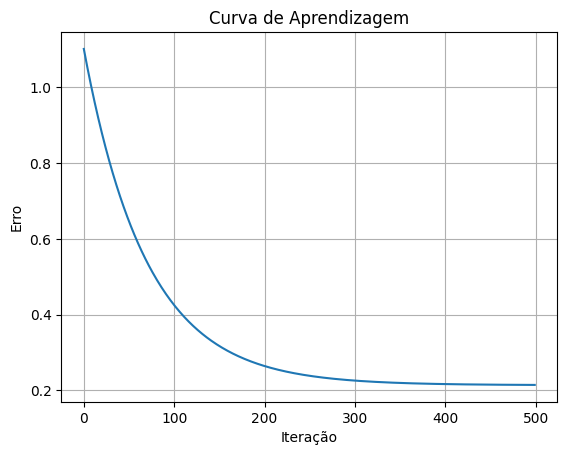

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro quadrático médio (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradiente_descendente(X, y, m=0, b=0, taxa_de_aprendizado=0.01, numero_de_interecao=500, errors=None):
    # Inicializa a lista de erros se não for fornecida
    if errors is None:
        errors = []

    # Verifica se atingiu o número máximo de iterações
    if numero_de_interecao == 0:
        # Calcula as previsões com os parâmetros atuais
        y_pred = m * X + b

        # Calcula o erro quadrático médio
        mse = mean_squared_error(y, y_pred)

        # Retorna os parâmetros, o erro quadrático médio e a lista de erros
        return m, b, mse, errors
    else:
        # Calcula as previsões com os parâmetros atuais
        y_pred = m * X + b

        # Calcula o gradiente da função de custo (MSE) em relação a m e b
        grad_m = (-2/len(X)) * np.sum(X * (y - y_pred))
        grad_b = (-2/len(X)) * np.sum(y - y_pred)

        # Atualiza os parâmetros na direção oposta do gradiente
        m -= taxa_de_aprendizado * grad_m
        b -= taxa_de_aprendizado * grad_b

        # Calcula o erro
        cost = mean_squared_error(y, y_pred)

        # Armazena o valor do erro atual na lista de erros
        errors.append(cost)

        # Chama recursivamente a função para a próxima iteração
        return gradiente_descendente(X, y, m, b, taxa_de_aprendizado, numero_de_interecao - 1, errors)

# Exemplo de uso
X = df.x
y = df.y

# Chama a função gradiente_descendente para obter os parâmetros, o erro quadrático médio e a lista de erros
m_final, b_final, mse, errors = gradiente_descendente(X, y)

# Exibe os resultados
print("Parâmetro m:", m_final)
print("Parâmetro b:", b_final)
print("Erro quadrático médio (MSE):", mse)

# Plota a curva de aprendizagem (erro por iteração)
plt.plot(range(len(errors)), errors)
plt.xlabel('Iteração')
plt.ylabel('Erro')
plt.title('Curva de Aprendizagem')
plt.grid()
plt.show()


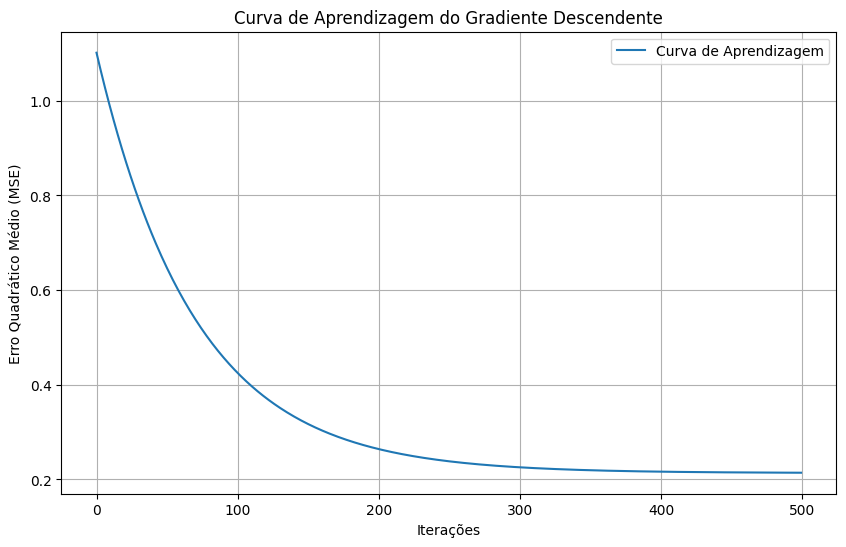

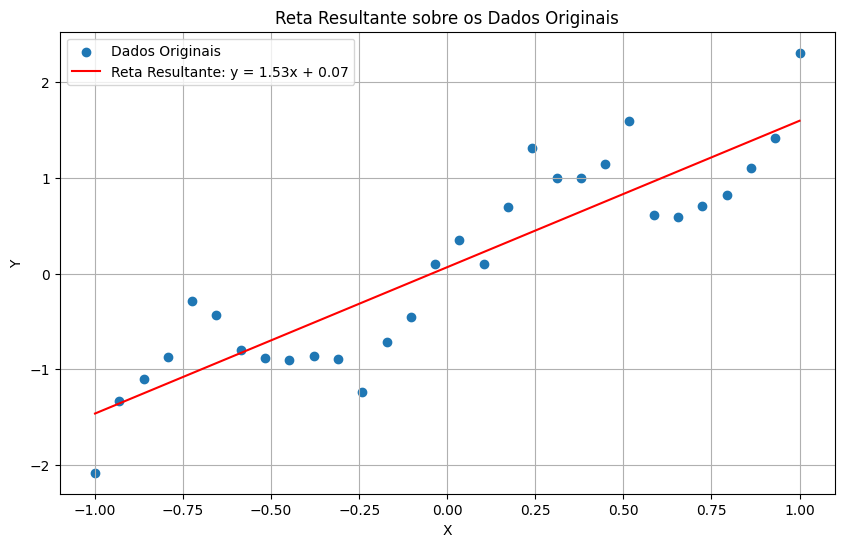

Parâmetros do Modelo: m = 1.53, b = 0.07
MSE Final: 0.21


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro quadrático médio (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Função para calcular o gradiente descendente
def gradient_descent(X, y, learning_rate=0.01, num_iterations=500):
    # Inicialização dos parâmetros
    m, b = 0, 0  # Inclinação e intercepto inicializados com 0
    n = len(X)
    errors = []  # Lista para armazenar os erros por iteração

    # Gradiente descendente
    for _ in range(num_iterations):
        # Calcula as previsões com os parâmetros atuais
        y_pred = m * X + b

        # Calcula o gradiente da função de custo (MSE) em relação a m e b
        grad_m = (-2/n) * np.sum(X * (y - y_pred))
        grad_b = (-2/n) * np.sum(y - y_pred)

        # Atualiza os parâmetros na direção oposta do gradiente
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

        # Calcula o erro
        cost = mean_squared_error(y, y_pred)
        errors.append(cost)  # Armazena o erro

    return m, b, errors

# Dados de exemplo
x = df.x
y = df.y

# Executa o gradiente descendente
m_final, b_final, errors = gradient_descent(x, y, learning_rate=0.01, num_iterations=500)

# Calcula o MSE com os parâmetros finais
y_pred_final = m_final * x + b_final
mse_final = mean_squared_error(y, y_pred_final)

# Plotar a curva de aprendizagem (MSE versus iterações)
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, label='Curva de Aprendizagem')
plt.xlabel('Iterações')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('Curva de Aprendizagem do Gradiente Descendente')
plt.legend()
plt.grid()
plt.show()

# Plotar a reta resultante sobre os dados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dados Originais')
plt.plot(x, y_pred_final, color='red', label=f'Reta Resultante: y = {m_final:.2f}x + {b_final:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Reta Resultante sobre os Dados Originais')
plt.legend()
plt.grid()
plt.show()

# Exibir os parâmetros do modelo e o MSE final
print(f"Parâmetros do Modelo: m = {m_final:.2f}, b = {b_final:.2f}")
print(f"MSE Final: {mse_final:.2f}")


In [ ]:
def regressao_ols(X, y):
    # Calcula os parâmetros do modelo diretamente usando a fórmula fechada
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [ ]:
import numpy as np

# Função de regressão linear
def regressao_ols(X, y):
    # Calcula os parâmetros do modelo diretamente usando a fórmula fechada
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Exemplo de dados
X = np.array([[1], [2], [3], [4], [5]])  # Variável independente
y = np.array([2, 4, 5, 4, 5])  # Variável dependente

# Adicionando uma coluna de 1s para o termo de viés (interceptação)
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Calculando os parâmetros do modelo
regressao_ols(X_with_bias, y)




array([2.2, 0.6])

In [ ]:
# Adicionando a primeira coluna de 1s manualmente
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[1., 1., 1.],
       [1., 1., 2.],
       [1., 1., 3.],
       [1., 1., 4.],
       [1., 1., 5.]])

In [ ]:
import statsmodels.api as sm


In [ ]:
X_train_com_constante = sm.add_constant(X)

In [ ]:
X_train_com_constante

,const,x
0,1.0,-1.000000
1,1.0,-0.931034
2,1.0,-0.862069
3,1.0,-0.793103
4,1.0,-0.724138
5,1.0,-0.655172
6,1.0,-0.586207
7,1.0,-0.517241
8,1.0,-0.448276
9,1.0,-0.379310


In [ ]:
modelo_stasmodels = sm.OLS(y, X_train_com_constante, hasconst = True).fit()


In [ ]:
print(modelo_stasmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     116.0
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.83e-11
Time:                        15:10:35   Log-Likelihood:                -19.399
No. Observations:                  30   AIC:                             42.80
Df Residuals:                      28   BIC:                             45.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0676      0.087      0.775      0.4

In [ ]:
# Calculando as previsões do modelo
y_pred = modelo_stasmodels.predict(X_train_com_constante)

# Calculando o erro quadrático médio (RMSE)
rmse = np.mean((y - y_pred) ** 2)

print(f"RMSE: {rmse}")

RMSE: 0.21340090132936984


In [ ]:
import numpy as np

def gradiente_estocastico(X, y, m=0, b=0, taxa_de_aprendizado=0.01, numero_de_interecao=500, errors=None):
    # Inicializa a lista de erros se não for fornecida
    if errors is None:
        errors = []

    # Verifica se atingiu o número máximo de iterações
    if numero_de_interecao == 0:
        # Calcula as previsões com os parâmetros atuais
        y_pred = m * X + b

        # Calcula o erro quadrático médio
        mse = erro_quadratico_medio(y, y_pred)

        # Retorna os parâmetros, o erro quadrático médio e a lista de erros
        return m, b, mse, errors
    else:
        # Embaralha os índices dos dados
        indices_embaralhados = np.random.choice(len(X), len(X), replace=False)

        # Seleciona todos os pontos de dados aleatórios de uma vez
        X_points = X[indices_embaralhados]
        y_points = y[indices_embaralhados]

        # Calcula as previsões para todos os pontos de dados aleatórios
        y_preds = m * X_points + b

        # Calcula o gradiente da função de custo (MSE) em relação a m e b para todos os pontos de dados aleatórios
        grad_m = np.mean((-2) * X_points * (y_points - y_preds))
        grad_b = np.mean((-2) * (y_points - y_preds))

        # Atualiza os parâmetros na direção oposta do gradiente
        m -= taxa_de_aprendizado * grad_m
        b -= taxa_de_aprendizado * grad_b

        # Calcula o erro para os pontos de dados aleatórios
        cost = erro_quadratico_medio(y_points, y_preds)

        # Armazena o valor do erro atual na lista de erros
        errors.append(cost)

        # Chama recursivamente a função para a próxima iteração
        return gradiente_estocastico(X, y, m, b, taxa_de_aprendizado, numero_de_interecao - 1, errors)

# Função para calcular o erro quadrático médio (RMSE)
def erro_quadratico_medio(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Dados de exemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])

# Chamando a função gradiente_estocastico
m_final, b_final, mse_final, errors = gradiente_estocastico(x, y)

# Imprimindo os resultados
print(f"Coeficiente m: {m_final}")
print(f"Coeficiente b: {b_final}")
print(f"Erro Quadrático Médio (MSE): {mse_final}")
print("Lista de Erros:", errors)


Coeficiente m: 9.868962398065676
Coeficiente b: 0.4730873209888516
Erro Quadrático Médio (MSE): 0.20183564928082737
Lista de Erros: [33.166247903554, 25.328245103046523, 19.347796153567465, 14.786243658319716, 11.308978769477331, 8.660886209817393, 6.647605591264841, 5.121220001695095, 3.9692941474705687, 3.106410098849619, 2.467515269441639, 2.0025553750424967, 1.6720999036223465, 1.4440153019211746, 1.2914797983884354, 1.1923527318405325, 1.1292418908331017, 1.089398260603609, 1.064086081282702, 1.0476349690083266, 1.036503484424335, 1.0285354428397435, 1.0224389681546013, 1.0174476020571632, 1.013109288792242, 1.0091583383393363, 1.0054389136484039, 1.00185971628648, 0.9983672903934016, 0.9949303438932269, 0.9915305569575358, 0.9881571993066304, 0.9848039799963463, 0.9814672044400743, 0.9781446964386653, 0.9748351677483067, 0.9715378494105158, 0.9682522761671452, 0.9649781603971834, 0.9617153184023889, 0.9584636273037564, 0.9552229998373486, 0.9519933696164733, 0.9487746825138879, 0

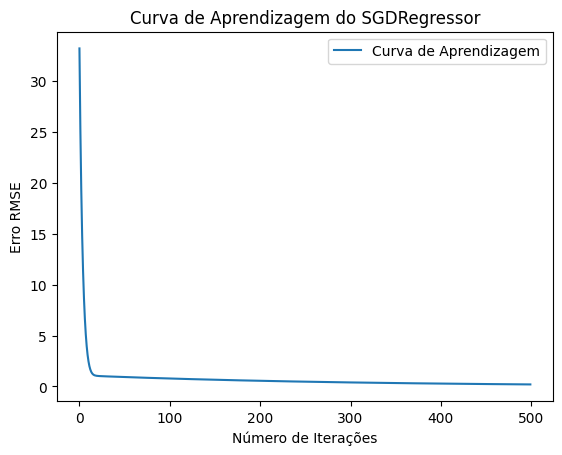

In [ ]:
# Plotar a curva de aprendizado
plt.plot(range(len(errors)), errors, label='Curva de Aprendizagem')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro RMSE')
plt.title('Curva de Aprendizagem do SGDRegressor')
plt.legend()
plt.show()

In [ ]:
if erros == errors:
    print("As listas são iguais.")
else:
    print("As listas são diferentes.")

As listas são diferentes.


In [ ]:
beta1, beta0 = np.polyfit(x, y, 1)  # Calcula os coeficientes


In [ ]:
# Define a semente (seed) fixa
np.random.seed(42)
# Embaralha os índices dos dados
indices_embaralhados = np.random.choice(len(X), len(X), replace=False)

# Seleciona todos os pontos de dados aleatórios de uma vez
X_points = X[indices_embaralhados]
y_points = y[indices_embaralhados]

# Calcula as previsões para todos os pontos de dados aleatórios
y_preds = m * X_points + b

# Calcula o gradiente da função de custo (MSE) em relação a m e b para todos os pontos de dados aleatórios
grad_m = np.mean((-2) * X_points * (y_points - y_preds))
grad_b = np.mean((-2) * (y_points - y_preds))

# Atualiza os parâmetros na direção oposta do gradiente
m -= taxa_de_aprendizado * grad_m
b -= taxa_de_aprendizado * grad_b

# Calcula o erro para os pontos de dados aleatórios
cost = erro_quadratico_medio(y_points, y_preds)

# Armazena o valor do erro atual na lista de erros
errors.append(cost)


NameError: name 'm' is not defined

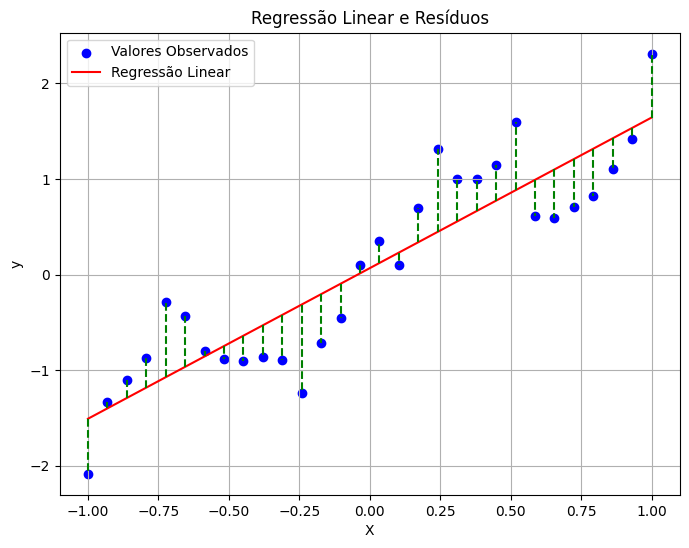

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Ajuste de uma regressão linear simples
#beta1, beta0 = np.polyfit(X, y, 1)  # Calcula os coeficientes

# Calcula os valores previstos
y_pred = beta0 + beta1 * X

# Calcula a diferença entre os valores observados e previstos
residuos = y - y_pred

# Plotagem do gráfico
plt.figure(figsize=(8, 6))

# Plotando os pontos (valores observados)
plt.scatter(X, y, color='blue', label='Valores Observados')

# Plotando a linha de regressão
plt.plot(X, y_pred, color='red', label='Regressão Linear')

# Plotando as diferenças (resíduos) como linhas pontilhadas
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y_pred[i], y[i]], color='green', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear e Resíduos')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split

# # Suponha que 'x_normalizado' seja a matriz de entrada normalizada e 'y' seja o vetor de saída
# x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_normalizado, y, test_size=0.2)

# print("Tamanho dos dados de treinamento (entrada):", len(x_treinamento))
# print("Tamanho dos dados de teste (entrada):", len(x_teste))
# print("Tamanho dos dados de treinamento (saída):", len(y_treinamento))
# print("Tamanho dos dados de teste (saída):", len(y_teste))

# # Verificar se há repetições
# repeticoes_x = len(np.intersect1d(x_treinamento, x_teste))
# repeticoes_y = len(np.intersect1d(y_treinamento, y_teste))

# if repeticoes_x > 0 or repeticoes_y > 0:
#     print("Houve repetições de dados entre os conjuntos de treinamento e teste.")
# else:
#     print("Não houve repetições de dados entre os conjuntos de treinamento e teste.")



In [ ]:
# def OLS(x, y,alpha=0.01):
#     """
#     Calcula os parâmetros do modelo de regressão linear utilizando a equação normal.

#     Parâmetros:
#     - x: matriz de características
#     - y: vetor de saída

#     Retorna:
#     - theta: vetor de parâmetros do modelo
#     """

#     # Calcular os parâmetros do modelo de regressão linear
#     matriz_x_transposta = x.T
#     produto_matriz = matriz_x_transposta @ x
#     # Adicionando regularização à diagonal da matriz
#     produto_matriz += alpha * np.eye(produto_matriz.shape[0])
#     inverso_da_matriz = np.linalg.inv(produto_matriz)
#     theta = inverso_da_matriz @ matriz_x_transposta @ y
#     return theta

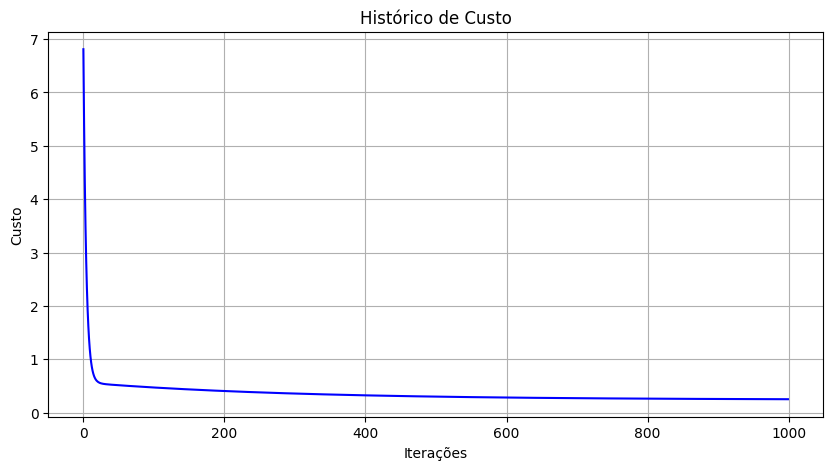

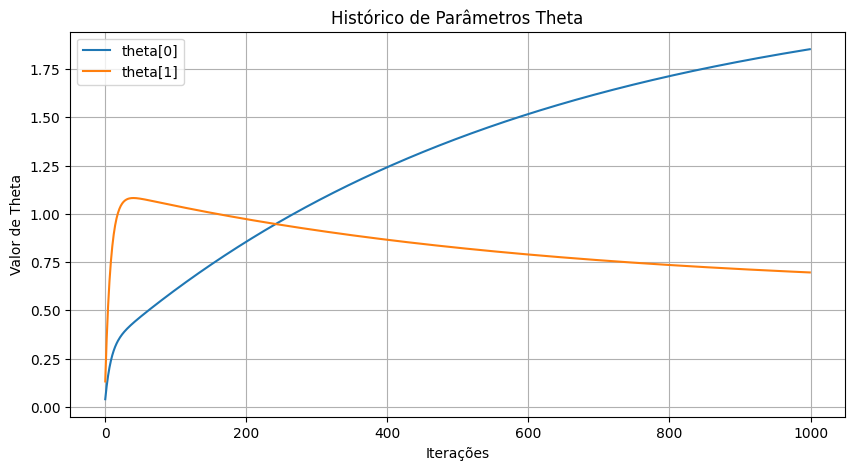

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradiente_descendente(X, y, teta, taxa_de_aprendizado, interacoes):
    m = len(y)  # Número de treinamento
    custo = np.zeros(interacoes)  # Inicializa um array para armazenar o histórico de custos durante as iterações
    theta_history = np.zeros((interacoes, len(teta)))  # Inicializa um array para armazenar o histórico de parâmetros theta durante as iterações

    for i in range(interacoes):
        # Calcula o gradiente da função de custo em relação aos parâmetros theta
        gradiente = (1/m) * X.T.dot(X.dot(teta) - y)
        # Atualiza os parâmetros theta usando o gradiente descendente
        teta = teta - taxa_de_aprendizado * gradiente
        # Calcula o custo após a atualização dos parâmetros e armazena no histórico de custos
        custo[i] = MSE(X, y, teta)
        # Armazena os parâmetros theta atualizados no histórico
        theta_history[i] = teta

    return teta, custo, theta_history

# Função para calcular o erro quadrático médio (MSE)
def MSE(X, y, teta):
    m = len(y)
    predictions = X.dot(teta)
    mse = (1/(2*m)) * np.sum(np.square(predictions - y))
    return mse

# Exemplo de dados
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4], [1, 5]])  # Matriz de características (incluindo termo de bias)
y = np.array([2, 4, 5, 4, 5])  # Vetor de rótulos

# Parâmetros iniciais
teta = np.array([0, 0])  # Theta inicial
taxa_de_aprendizado = 0.01
interacoes = 1000

# Executar gradiente descendente
teta_final, custo, theta_history = gradiente_descendente(X, y, teta, taxa_de_aprendizado, interacoes)

# Plotar o histórico de custo
plt.figure(figsize=(10, 5))
plt.plot(range(interacoes), custo, color='blue')
plt.title('Histórico de Custo')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid(True)
plt.show()

# Plotar o histórico de parâmetros theta
plt.figure(figsize=(10, 5))
for i in range(len(teta)):
    plt.plot(range(interacoes), theta_history[:, i], label=f'theta[{i}]')
plt.title('Histórico de Parâmetros Theta')
plt.xlabel('Iterações')
plt.ylabel('Valor de Theta')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# def regressao_ols(x, y):
#     """
#     Calcula os parâmetros do modelo de regressão linear utilizando a equação normal.

#     Parâmetros:
#     - x: matriz de características
#     - y: vetor de saída

#     Retorna:
#     - theta: vetor de parâmetros do modelo
#     """

#     # Verificar se a primeira coluna de x é composta por 1s
#     if np.all(x[:, 0] == 1):
#         matriz_x = x
#     else:
#         # Adicionando a primeira coluna de 1s à matriz de características
#         matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

#     # Calcular os parâmetros do modelo de regressão linear
#     matriz_x_transposta = matriz_x.T
#     produto_matriz = matriz_x_transposta @ matriz_x
#     inverso_da_matriz = np.linalg.inv(produto_matriz)
#     theta = inverso_da_matriz @ matriz_x_transposta @ y
#     return theta

In [ ]:
# def polinomial(x, grau):
#     """
#     Gera características polinomiais até o grau especificado, incluindo fatoriais, para cada característica.

#     Parâmetros:
#     - x: array-like contendo as características
#     - grau: o grau máximo do polinômio

#     Retorna:
#     - matriz de características polinomiais
#     """
#     n_samples, n_features = x.shape

#     # Inicializar a matriz de características polinomiais com a coluna de 1s
#     polinomio = np.ones((n_samples, 1))

#     for d in range(1, grau + 1):
#         for i in range(n_features):
#             nova_coluna = (x[:, i] ** d).reshape(-1, 1)  # Tornar bidimensional
#             polinomio = np.hstack((polinomio, nova_coluna))

#     return polinomio

In [ ]:
import numpy as np

def polinomial(x, grau):
    """
    Função que gera um polinômio de um determinado grau para cada coluna de uma matriz de entrada.

    Parâmetros:
    - x: array-like, matriz de entrada onde cada coluna representa uma variável
    - grau: int, grau inicial do polinômio (o grau decresce com o fatorial)

    Retorna:
    - matriz: array, matriz onde cada coluna representa um termo do polinômio para cada coluna de x
    """
    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(x[:, 0] == 1):
        matriz_x = x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Criando um novo array para armazenar as potências
    matriz = np.empty((x.shape[0], 0))

    # Iterando sobre as colunas da matriz de entrada
    for coluna in range(matriz_x.shape[1]):
        coluna_original = matriz_x[:, coluna]  # Selecionando a coluna original
        colunas_potencias = np.empty((x.shape[0], 0))  # Inicializando um array para armazenar as potências da coluna atual
        # Iterando sobre os graus do polinômio
        for j in range(1, grau+1):
            # Calculando as potências dos elementos da coluna e armazenando no array
            potencia = coluna_original ** j
            colunas_potencias = np.concatenate((colunas_potencias, potencia[:, np.newaxis]), axis=1)
        # Adicionando as potências como novas colunas ao array
        matriz = np.concatenate((matriz, colunas_potencias), axis=1)
    return matriz

# Exemplo de uso
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Matriz de entrada com 3 colunas
grau = 3
matriz_polinomial = polinomial(x, grau)
print(matriz_polinomial)


[[  1.   1.   1.   1.   1.   1.   2.   4.   8.   3.   9.  27.]
 [  1.   1.   1.   4.  16.  64.   5.  25. 125.   6.  36. 216.]
 [  1.   1.   1.   7.  49. 343.   8.  64. 512.   9.  81. 729.]]


In [ ]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
import numpy as np
# Criando um array de exemplo
arr = np.array([[1, 4], [2, 5], [3, 6]])
# Criando um novo array para armazenar as potências
nova_arr = np.empty((arr.shape[0], 0))
nova_arr

array([], shape=(3, 0), dtype=float64)

In [ ]:
import pandas as pd

# Criando um DataFrame de exemplo sem nome de colunas
df = pd.DataFrame([[1, 4], [2, 5], [3, 6]])

n = 3
# Adicionando uma nova coluna sem especificar o nome
for i in range(df.shape[1]):
    for j in range(n,0,-1):
      if n == 1:
        break

      else:
        coluna_nova = df[i].values ** j
        df[len(df.columns)] = coluna_nova

print(df)



   0  1   2  3  4    5   6  7
0  1  4   1  1  1   64  16  4
1  2  5   8  4  2  125  25  5
2  3  6  27  9  3  216  36  6


In [ ]:
import numpy as np

# Criando um array de exemplo
arr = np.array([[1, 4], [2, 5], [3, 6]])

# Número de iterações para multiplicação
n = 3

# Criando um novo array para armazenar as potências
nova_arr = np.empty((arr.shape[0], 0))

# Iterando sobre as colunas do array
for coluna in range(arr.shape[1]):
    coluna_original = arr[:, coluna]  # Selecionando a coluna original
    colunas_potencias = np.empty((arr.shape[0], 0))  # Inicializando um array para armazenar as potências da coluna atual
    # Iterando sobre os multiplicadores
    for j in range(1, n+1):
        # Calculando as potências dos elementos da coluna e armazenando no array
        potencia = coluna_original ** j
        colunas_potencias = np.concatenate((colunas_potencias, potencia[:, np.newaxis]), axis=1)
    # Adicionando as potências como novas colunas ao array
    nova_arr = np.concatenate((nova_arr, colunas_potencias), axis=1)

print(nova_arr)



[[  1.   1.   1.   4.  16.  64.]
 [  2.   4.   8.   5.  25. 125.]
 [  3.   9.  27.   6.  36. 216.]]


In [ ]:
matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))
matriz_x

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.],
       [1., 7., 8., 9.]])

In [ ]:
import pandas as pd

# Criando um DataFrame de exemplo
df = pd.DataFrame([[1, 4], [2, 5], [3, 6]])

# Número de iterações para multiplicação
n = 5

# Criando um novo DataFrame para armazenar as potências
nova = pd.DataFrame()

# Iterando sobre as colunas do DataFrame
for coluna in df.columns:
    coluna_original = df[coluna]  # Selecionando a coluna original
    colunas_potencias = {}  # Inicializando um dicionário para armazenar as potências da coluna atual
    # Iterando sobre os multiplicadores
    for j in range(1, n):
        # Calculando as potências dos elementos da coluna e armazenando no dicionário
        colunas_potencias[f'{j}'] = coluna_original ** j
    # Adicionando as potências como novas colunas ao DataFrame
    nova = pd.concat([nova, pd.DataFrame(colunas_potencias)], axis=1)

print(nova)


   1  2   3   4  1   2    3     4
0  1  1   1   1  4  16   64   256
1  2  4   8  16  5  25  125   625
2  3  9  27  81  6  36  216  1296


In [ ]:
import math

n = 5
fatorial_n = math.factorial(n)
print(f"O fatorial de {n} é {fatorial_n}")


O fatorial de 5 é 120


In [ ]:
# def polinomial(x, grau):
#     """
#     Função que gera um polinômio de um determinado grau.

#     Parâmetros:
#     - x: array-like, vetor de entrada
#     - grau: int, grau do polinômio

#     Retorna:
#     - matriz: array, matriz onde cada coluna representa um termo do polinômio
#     """
#     # Verificar se a primeira coluna de x é composta por 1s
#     if np.all(x[:, 0] == 1):
#         matriz_x = x
#     else:
#         # Adicionando a primeira coluna de 1s à matriz de características
#         matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

#     # Inicializa uma matriz vazia para armazenar os termos do polinômio
#     matriz = np.zeros((len(matriz_x), grau + 1))

#     # Preenche a matriz com os termos do polinômio
#     for i in range(grau + 1):
#         matriz[:, i] = matriz_x[:,1] ** (grau - i)

#     return matriz

def polinomial(x, grau):
    """
    Função que gera um polinômio de um determinado grau.

    Parâmetros:
    - x: array-like, vetor de entrada
    - grau: int, grau do polinômio

    Retorna:
    - matriz: array, matriz onde cada coluna representa um termo do polinômio
    """
    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(x[:, 0] == 1):
        matriz_x = x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Inicializa uma matriz vazia para armazenar os termos do polinômio
    matriz = np.zeros((len(matriz_x), grau + 1))

    # Preenche a matriz com os termos do polinômio
    for i in range(grau + 1):
        matriz[:, i] = matriz_x[:, 1] ** i

    return matriz

TypeError: DataFrame.insert() missing 1 required positional argument: 'column'

In [ ]:
import pandas as pd

df = pd.DataFrame(matriz_polinomial)

In [ ]:
def polinomial(x, grau):
    """
    Função que gera um polinômio de um determinado grau para cada coluna de uma matriz de entrada.

    Parâmetros:
    - x: array-like, matriz de entrada onde cada coluna representa uma variável
    - grau: int, grau inicial do polinômio (o grau decresce com o fatorial)

    Retorna:
    - matriz: array, matriz onde cada coluna representa um termo do polinômio para cada coluna de x
    """
    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(x[:, 0] == 1):
        matriz_x = x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Número de colunas em x
    num_colunas = matriz_x.shape[1]

    # Inicializa uma matriz vazia para armazenar os termos do polinômio
    matriz = np.zeros((len(matriz_x), (grau + 1) * num_colunas))

    # Preenche a matriz com os termos do polinômio
    for i in range(num_colunas):
        for j in range(grau + 1):
            matriz[:, i * (grau + 1) + j] = matriz_x[:, i] ** (grau - j)

    return matriz

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,4.0,2.0,1.0,27.0,9.0,3.0,1.0
1,1.0,1.0,1.0,1.0,64.0,16.0,4.0,1.0,125.0,25.0,5.0,1.0,216.0,36.0,6.0,1.0
2,1.0,1.0,1.0,1.0,343.0,49.0,7.0,1.0,512.0,64.0,8.0,1.0,729.0,81.0,9.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Separar os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados de entrada (x) apenas para os conjuntos de treinamento e teste
scaler_x = StandardScaler()
x_treino_normalizado = scaler_x.fit_transform(x_treino)
x_teste_normalizado = scaler_x.transform(x_teste)

# Normalizar os rótulos (y) apenas para os conjuntos de treinamento e teste
scaler_y = StandardScaler()
y_treino_normalizado = scaler_y.fit_transform(y_treino.reshape(-1, 1)).flatten()
y_teste_normalizado = scaler_y.transform(y_teste.reshape(-1, 1)).flatten()

# Definir o grau do polinômio desejado
grau = 6

# Gerar características polinomiais até o grau especificado para os conjuntos de treinamento e teste
poly_features = PolynomialFeatures(degree=grau)
x_poly_treino = poly_features.fit_transform(x_treino_normalizado)
x_poly_teste = poly_features.transform(x_teste_normalizado)

# Inicializar e treinar o modelo de regressão linear com os dados de treinamento
modelo_regressao = LinearRegression()
modelo_regressao.fit(x_poly_treino, y_treino_normalizado)  # Normalizamos os rótulos (y)

# Fazer previsões para o conjunto de teste
y_pred_teste_normalizado = modelo_regressao.predict(x_poly_teste)

# Desnormalizar as previsões para obter as previsões finais
y_pred_teste = scaler_y.inverse_transform(y_pred_teste_normalizado.reshape(-1, 1)).flatten()

# Calcular o RMSE no conjunto de teste
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))
print("RMSE no conjunto de teste:", rmse_teste)


In [ ]:
# import matplotlib.pyplot as plt

# # # Definir os graus de polinômio a serem testados
# # # graus = [1, 2, 3, 4, 5,6]

# # Listas para armazenar RMSEs
# rmse_treino = []
# rmse_teste = []

# for grau in graus:
#     # Gerar características polinomiais até o grau especificado para os conjuntos de treinamento e teste
#     poly_features = PolynomialFeatures(degree=grau)
#     x_poly_treino = poly_features.fit_transform(x_treino)
#     x_poly_teste = poly_features.transform(x_teste)

#     # Inicializar e treinar o modelo de regressão linear com os dados de treinamento
#     modelo_regressao = LinearRegression()
#     modelo_regressao.fit(x_poly_treino, y_treino)

#     # Fazer previsões para o conjunto de treinamento
#     y_pred_treino = modelo_regressao.predict(x_poly_treino)

#     # Fazer previsões para o conjunto de teste
#     y_pred_teste = modelo_regressao.predict(x_poly_teste)

#     # Calcular o RMSE no conjunto de treinamento e teste
#     rmse_treino.append(np.sqrt(mean_squared_error(y_treino, y_pred_treino)))
#     rmse_teste.append(np.sqrt(mean_squared_error(y_teste, y_pred_teste)))

# # Plotar RMSE no treinamento
# plt.plot(graus, rmse_treino, label='Treinamento')
# plt.xlabel('Grau do Polinômio')
# plt.ylabel('RMSE')
# plt.title('RMSE no Treinamento')
# plt.legend()
# plt.show()

# # Plotar RMSE no teste
# plt.plot(graus, rmse_teste, label='Teste')
# plt.xlabel('Grau do Polinômio')
# plt.ylabel('RMSE')
# plt.title('RMSE no Teste')
# plt.legend()
# plt.show()

